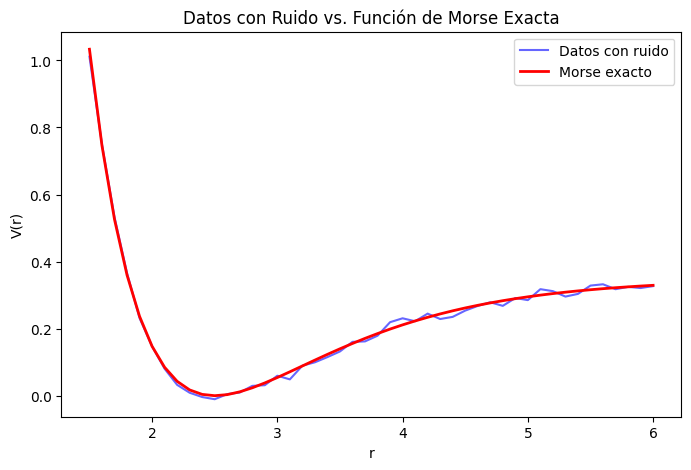

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense #type: ignore


def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0


r_values = np.linspace(1.5, 6.0, 46) #qvec


# Agregamos ruido gaussiano
#ruido = np.random.normal(scale=0.01)  # Ajusta la escala según necesites

ruido = 0.025*(np.random.random(len(r_values))-np.random.random(len(r_values)))  # Ruido aleatorio entre -0.025 y 0.025)
V_noisy = morsepotential(r_values,0.35,1.0,0.0,2.5) + ruido

plt.figure(figsize=(8, 5))
plt.plot(r_values, V_noisy, label="Datos con ruido", color='blue', alpha=0.6)
plt.plot(r_values, morsepotential(r_values,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=2)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Datos con Ruido vs. Función de Morse Exacta")
plt.show()

Epoch 1/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1125  
Epoch 2/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1.3273
Epoch 3/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7483 
Epoch 4/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1534 
Epoch 5/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1575 
Epoch 6/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.1438
Epoch 7/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0578
Epoch 8/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0941
Epoch 9/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0414 
Epoch 10/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0454 
Epoch 11/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0305
Epoch 12/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0476 
Epoch 13/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.0349
Epoch 14/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0242
Epoch 15/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.02

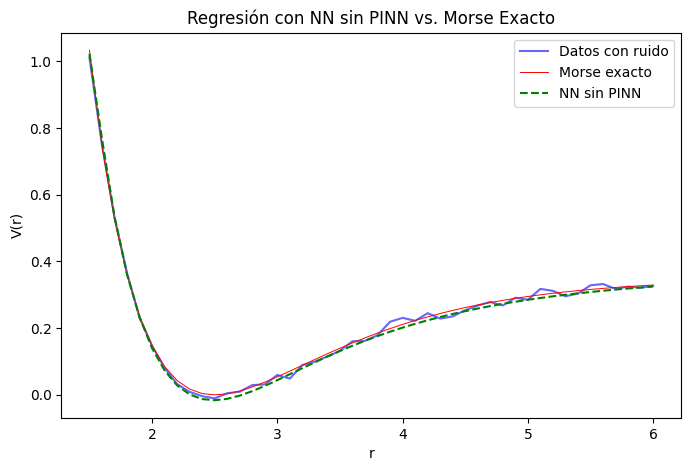

In [31]:
model = Sequential([
    Dense(90, activation='tanh', input_shape=(1,)),
    Dense(90, activation='tanh'),
    Dense(1)])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

#Entrenamos la red con los datos con ruido
model.fit(r_values, V_noisy, epochs=1200, batch_size=10)

# Predicción con NN sin PINN
V_pred_nn = model.predict(r_values)

plt.figure(figsize=(8, 5))
plt.plot(r_values, V_noisy, label="Datos con ruido", color='blue', alpha=0.6)
plt.plot(r_values, morsepotential(r_values,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=0.7)
plt.plot(r_values, V_pred_nn, label="NN sin PINN", color='green', linestyle='dashed')
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Regresión con NN sin PINN vs. Morse Exacto")
plt.show()


In [ ]:
D = 0.35
alpha = 1.0
R_eq = 2.5
E0 = 0.0

#Si mse mse_loss funciona, el pinnloss es igual. Pero y_true no serian los datos de entrada
#los valores exactos del potencial de Morse
def custom_loss_PINN(r_values, V_pred_nn):
    mse_loss = tf.reduce_mean(tf.square(V_pred_nn - y_true))

    lossRi = D * (1.0 - tf.exp(-alpha * (r_values - R_eq)))**2 + E0
    pinn_loss = tf.reduce_mean(tf.square(V_pred_nn - lossRi))

    lambda_pinn = 1
    total_loss = mse_loss #lambda_pinn * pinn_loss
    return total_loss


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=custom_loss_PINN)
model.fit(r_values, V_noisy, epochs=800, batch_size=10)

V_pred_pinn = model.predict(r_values)

# Graficar comparación NN sin PINN vs. PINN
plt.figure(figsize=(8, 5))
plt.plot(r_values, morsepotential(r_values,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=2)
plt.plot(r_values, V_pred_nn, label="NN sin PINN", color='green', linestyle='dashed')
plt.plot(r_values, V_pred_pinn, label="PINN", color='orange', linestyle='dashed')
plt.plot(r_values, V_noisy, label="Datos con ruido", color='blue', alpha=0.6)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Regresión con PINN vs. Sin PINN")
plt.show()


Epoch 1/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 2.9552
Epoch 2/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 4.6350
Epoch 3/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3957 
Epoch 4/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 1.5786
Epoch 5/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1332 
Epoch 6/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5081 
Epoch 7/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.2090
Epoch 8/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0869
Epoch 9/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.0490
Epoch 10/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0725 
Epoch 11/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220 
Epoch 12/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0212 
Epoch 13/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 
Epoch 14/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.0060
Epoch 15/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.0045
Epoch 16/80

KeyboardInterrupt: 

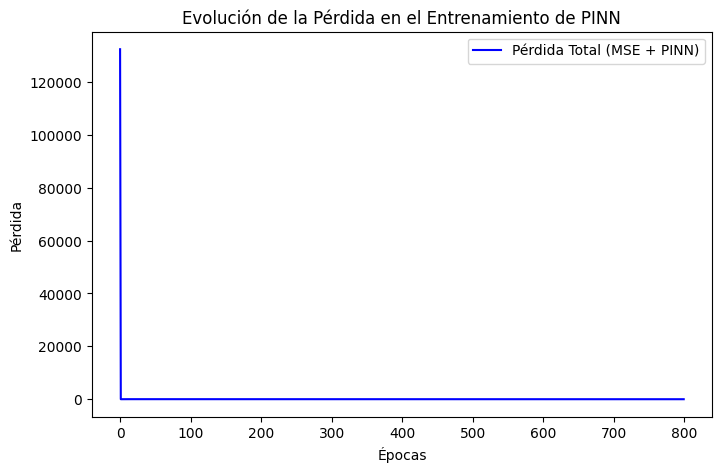

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Pérdida Total (MSE + PINN)", color='blue')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Evolución de la Pérdida en el Entrenamiento de PINN")
plt.show()
